### Bike Sharing Demand
Goal: To predict the future demands for rental bikes in cities

In [1]:
# importing essential modules for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing the dataframe
df1 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project2:Supervised_Learning/Bike_Sharing_Demand_Prediction/SeoulBikeData.csv', encoding='latin-1')

In [4]:
# Getting details of dataframe
df1.iloc[1000:1200]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1000,11/01/2018,179,16,-8.2,39,2.8,1807,-19.7,0.63,0.0,0.0,Winter,No Holiday,Yes
1001,11/01/2018,219,17,-9.3,43,2.8,1900,-19.6,0.28,0.0,0.0,Winter,No Holiday,Yes
1002,11/01/2018,352,18,-10.4,43,2.3,1985,-20.6,0.02,0.0,0.0,Winter,No Holiday,Yes
1003,11/01/2018,251,19,-10.9,44,3.0,2000,-20.7,0.00,0.0,0.0,Winter,No Holiday,Yes
1004,11/01/2018,177,20,-11.6,49,1.8,1953,-20.1,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,19/01/2018,471,19,2.0,48,1.8,1519,-7.8,0.00,0.0,0.0,Winter,No Holiday,Yes
1196,19/01/2018,342,20,1.2,51,0.6,1544,-7.8,0.00,0.0,0.0,Winter,No Holiday,Yes
1197,19/01/2018,331,21,0.5,52,0.8,1595,-8.2,0.00,0.0,0.0,Winter,No Holiday,Yes
1198,19/01/2018,292,22,0.0,56,0.8,1544,-7.7,0.00,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df1.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Initial Observations:
1. No. of Categorial Data: 4
   ['Date','Seasons','Holiday', 'Functioning Day']
2. No. of Numerical Data: 10
   ['Date', 'Rented Bike Count', 'Hour', 'Temperature(�C)', 'Humidity(%)',
    'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
    'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

In [6]:
df1.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
df1.shape

(8760, 14)

In [8]:
df1.info()    # No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
df1.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [10]:
df1.sort_values(['Rented Bike Count'], ascending=True)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8106,03/11/2018,0,18,14.2,51,1.5,990,4.1,0.02,0.0,0.0,Autumn,No Holiday,No
7341,02/10/2018,0,21,16.2,65,1.5,2000,9.6,0.00,0.0,0.0,Autumn,No Holiday,No
7342,02/10/2018,0,22,15.5,69,0.8,1987,9.8,0.00,0.0,0.0,Autumn,No Holiday,No
7343,02/10/2018,0,23,14.8,68,0.1,1994,8.9,0.00,0.0,0.0,Autumn,No Holiday,No
7368,04/10/2018,0,0,15.5,65,0.8,2000,8.9,0.00,0.0,0.0,Autumn,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4458,04/06/2018,3380,18,24.4,48,1.9,1998,12.6,0.56,0.0,0.0,Summer,No Holiday,Yes
4842,20/06/2018,3384,18,27.0,55,3.1,1246,17.1,1.26,0.0,0.0,Summer,No Holiday,Yes
4650,12/06/2018,3404,18,24.9,53,3.6,2000,14.6,1.28,0.0,0.0,Summer,No Holiday,Yes
4866,21/06/2018,3418,18,27.8,43,3.0,1933,14.0,1.35,0.0,0.0,Summer,No Holiday,Yes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


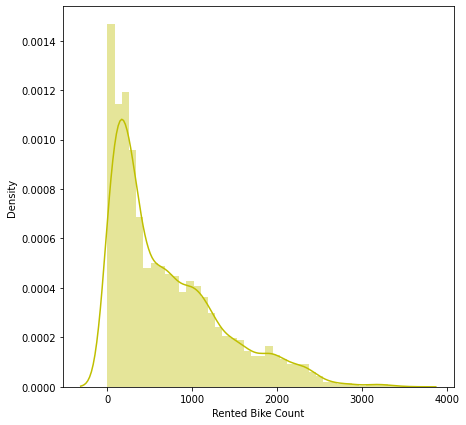

In [11]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(df1['Rented Bike Count'],color="y")

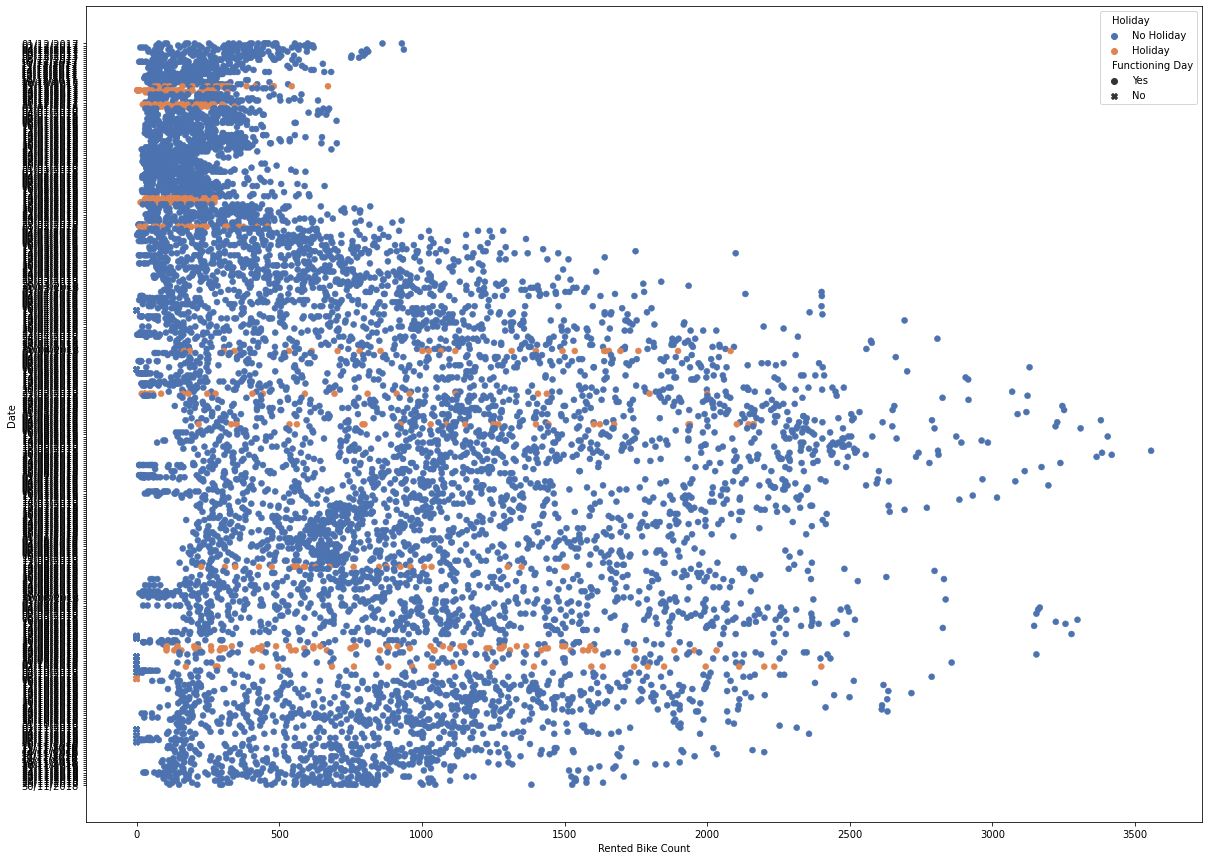

In [12]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.scatterplot(data=df1, x ='Rented Bike Count', y='Date', hue='Holiday', style='Functioning Day', palette='deep', marker='+', )

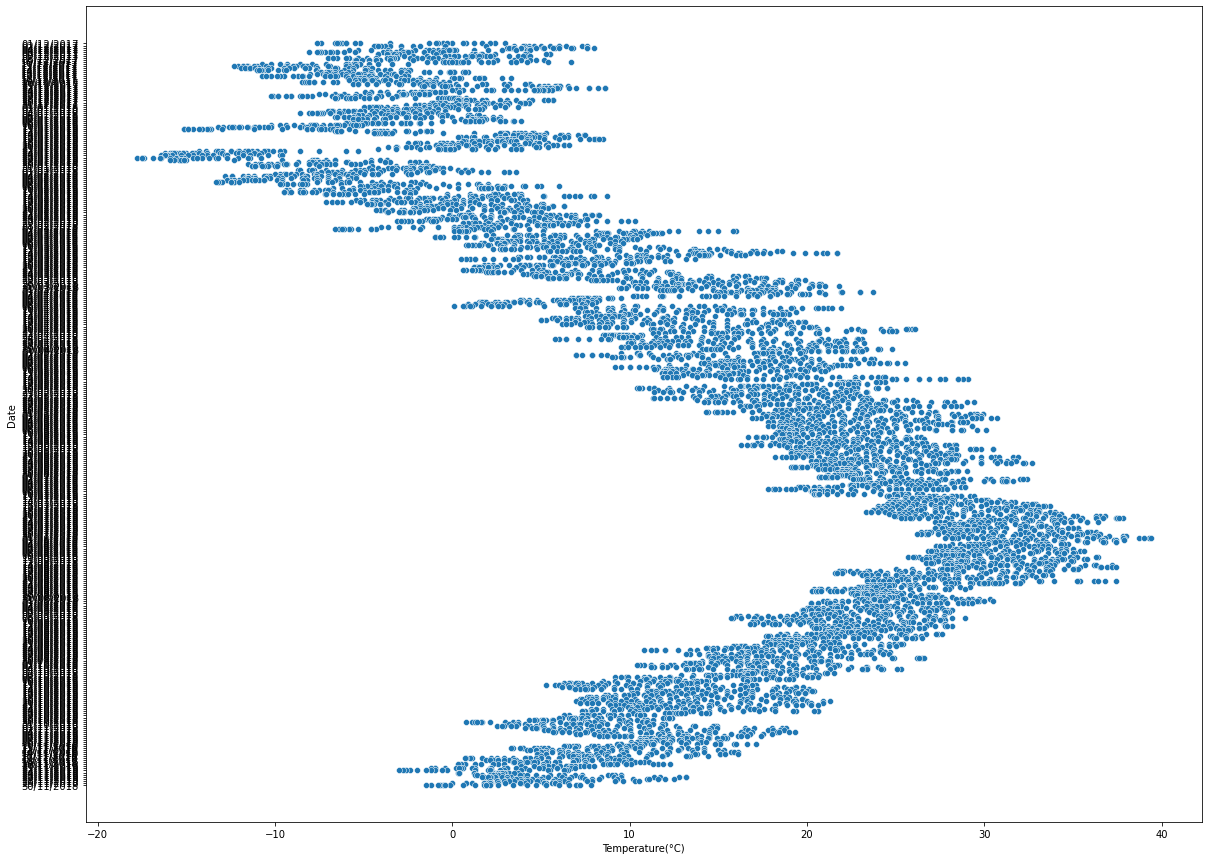

In [13]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.scatterplot(data=df1, x ='Temperature(°C)', y='Date')

### Observation  from the plot:
1. Most of the bikes are rented during working days.
2. Rental bikes are highly populated near 0-400 bikes/hour in the months of december 2017 to march 2018.
3. There are 10-20 days with maximum bikes/hour of 2500-3500 in the 1 year time period. 
4. Between March 2018 to November 2018, Bimodal Gaussian Distribution exists.

In [14]:
df1[(df1['Rented Bike Count']>=1000) & (df1['Rented Bike Count']<=2000)].shape

(1940, 14)

In [15]:
df_columns = df1.iloc[:, 2:-3]
percent_missing = df_columns.isnull().sum() * 100 / len(df_columns)
percent_missing =  pd.DataFrame({'years': df_columns.columns,
                                 'percent_missing': percent_missing})

percent_missing.T

# Note: no null values found

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
years,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
percent_missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Extracting essential columns
col_list = []
for e in list(df1.columns):
    col_list.append(e)
list2 = ['Rented Bike Count', 'Seasons', 'Holiday', 'Functioning Day']
for e in list2:
    col_list.remove(e)    
print(col_list)

['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [17]:
# Finding relation between dependent and independent variable columns
df1.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


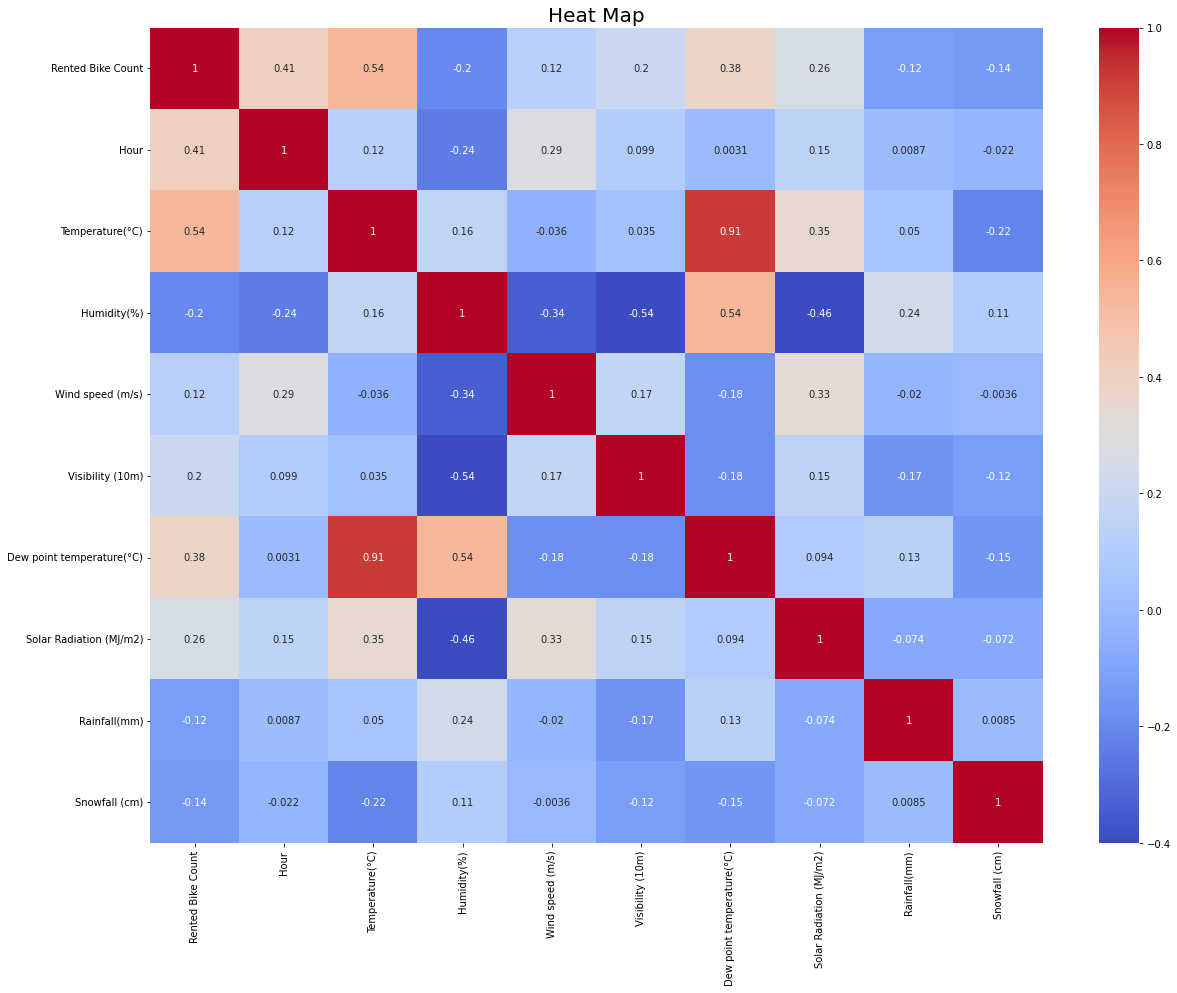

In [18]:
# Correlation heatmap
sns.heatmap(df1.corr(), vmin=-0.4, cmap='coolwarm', annot=True)
plt.title('Heat Map', fontsize=20)
plt.show()


### Observations from heatmap:
1. The dependent variable Rental Bike Count has high positive dependencies on:
   Hour(0.41), Temperature(0.54), Dew Point Temperature(0.38), Solar Radiation(0.26), 
2. Low positive dependency on Wind speed(0.12), Visibility(0.2)
3. Low negative dependency on Humidity(-0.2), Rainfall(-0.12), Snowfall(-0.14)

In [19]:
# Extracting particular dates(First 2 months):
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y')
df_dec_17 = df1.loc[(df1['Date']>='01/12/2017') & (df1['Date']<'01/02/2018')]
df_dec_17

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2018-01-01,125,19,-0.1,39,1.3,1911,-12.4,0.0,0.0,0.0,Winter,Holiday,Yes
764,2018-01-01,206,20,-0.3,40,1.2,1936,-12.2,0.0,0.0,0.0,Winter,Holiday,Yes
765,2018-01-01,203,21,-0.9,44,1.2,1871,-11.6,0.0,0.0,0.0,Winter,Holiday,Yes
766,2018-01-01,168,22,-1.3,48,0.8,1927,-10.9,0.0,0.0,0.0,Winter,Holiday,Yes


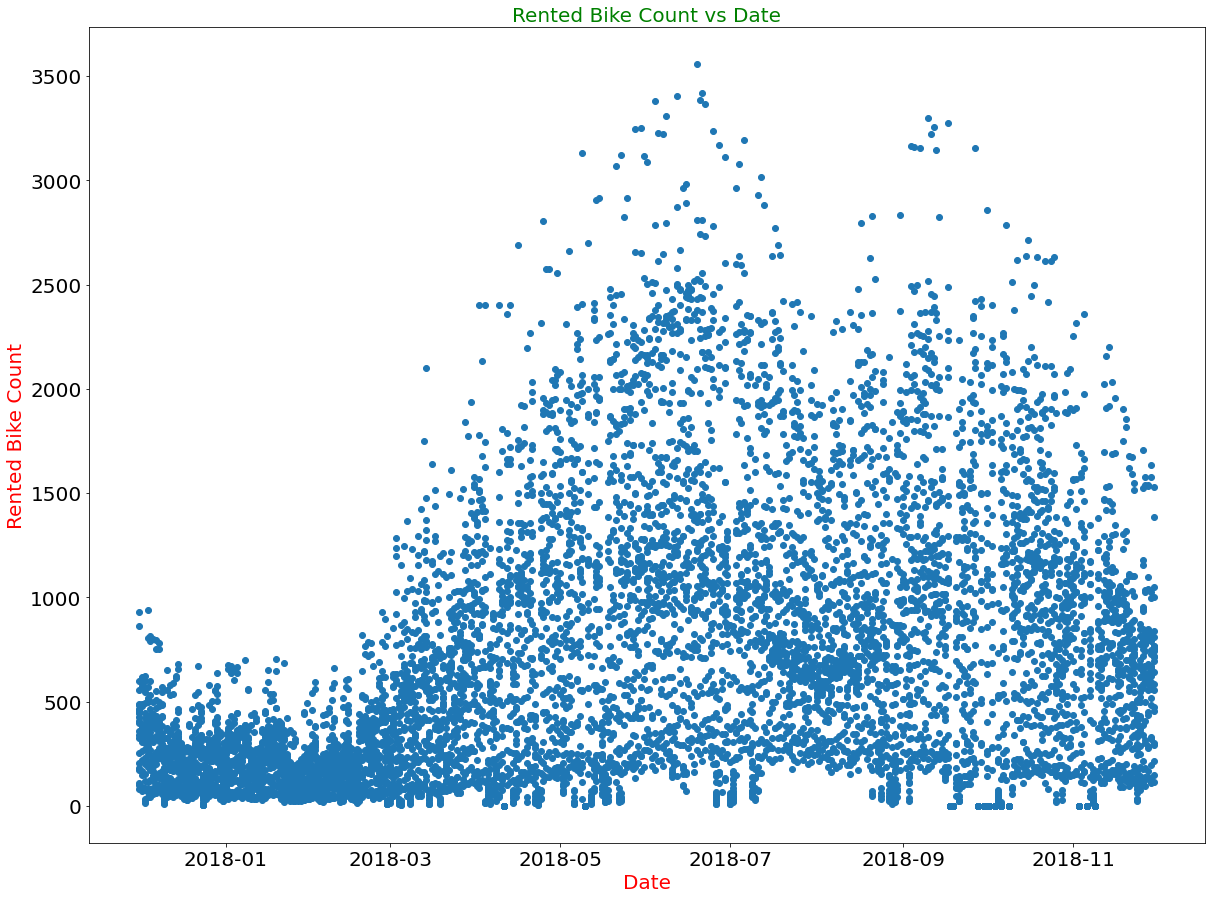

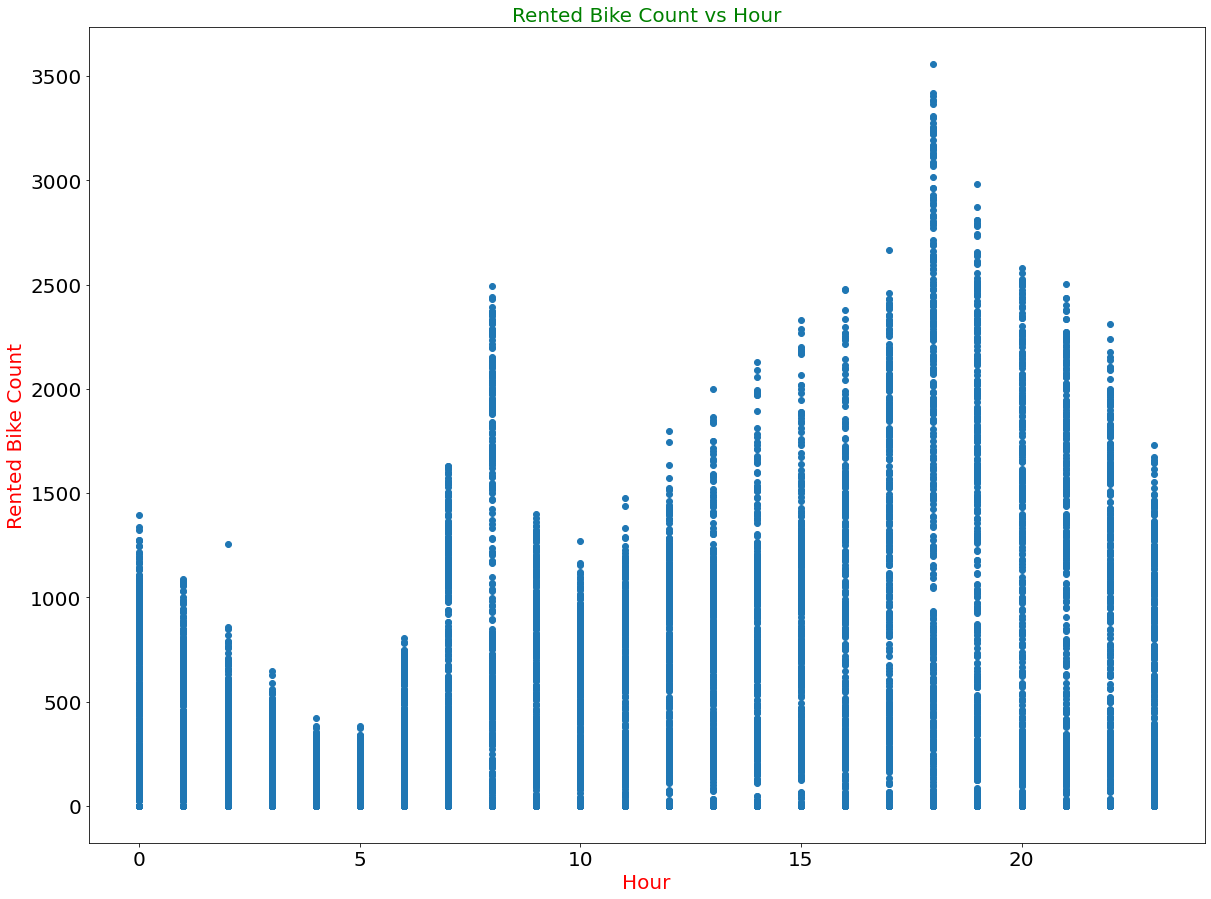

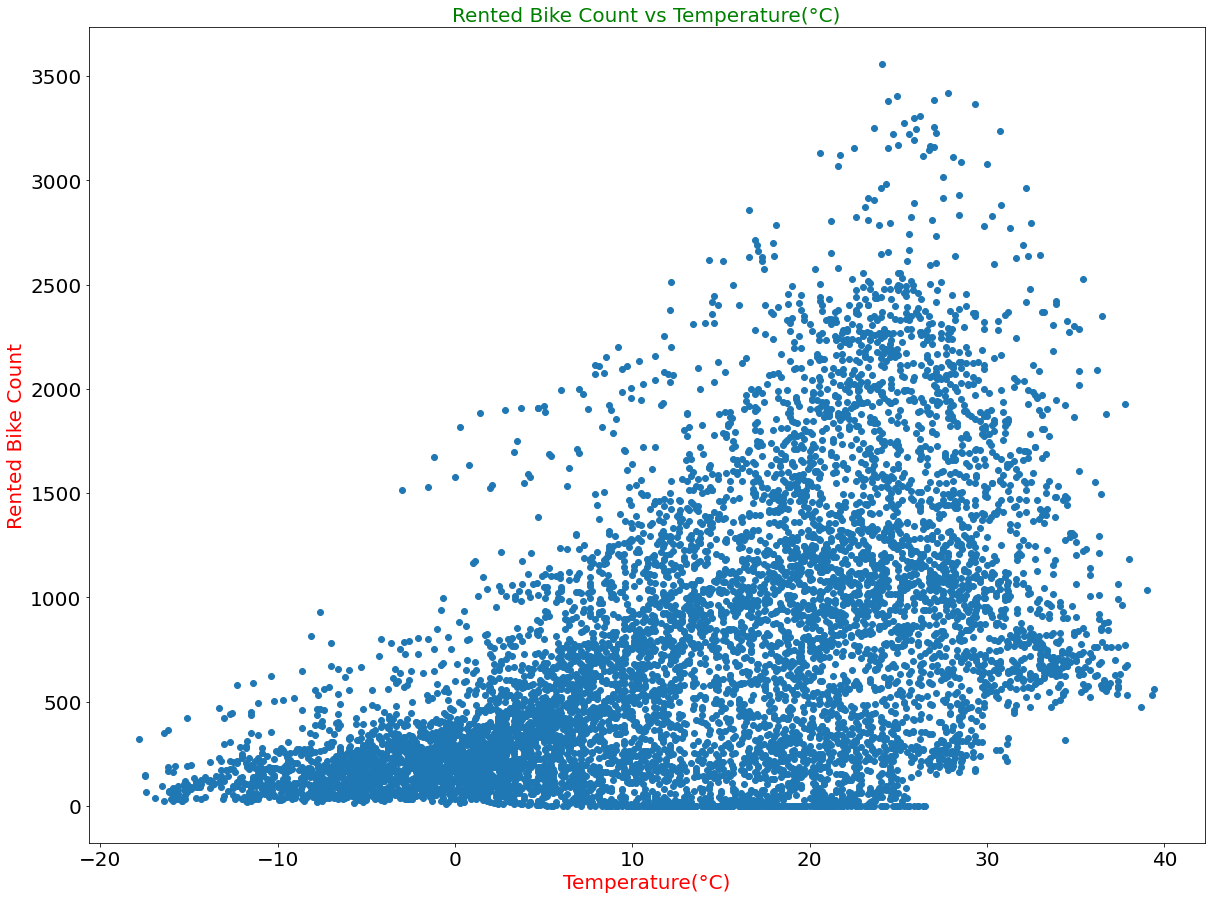

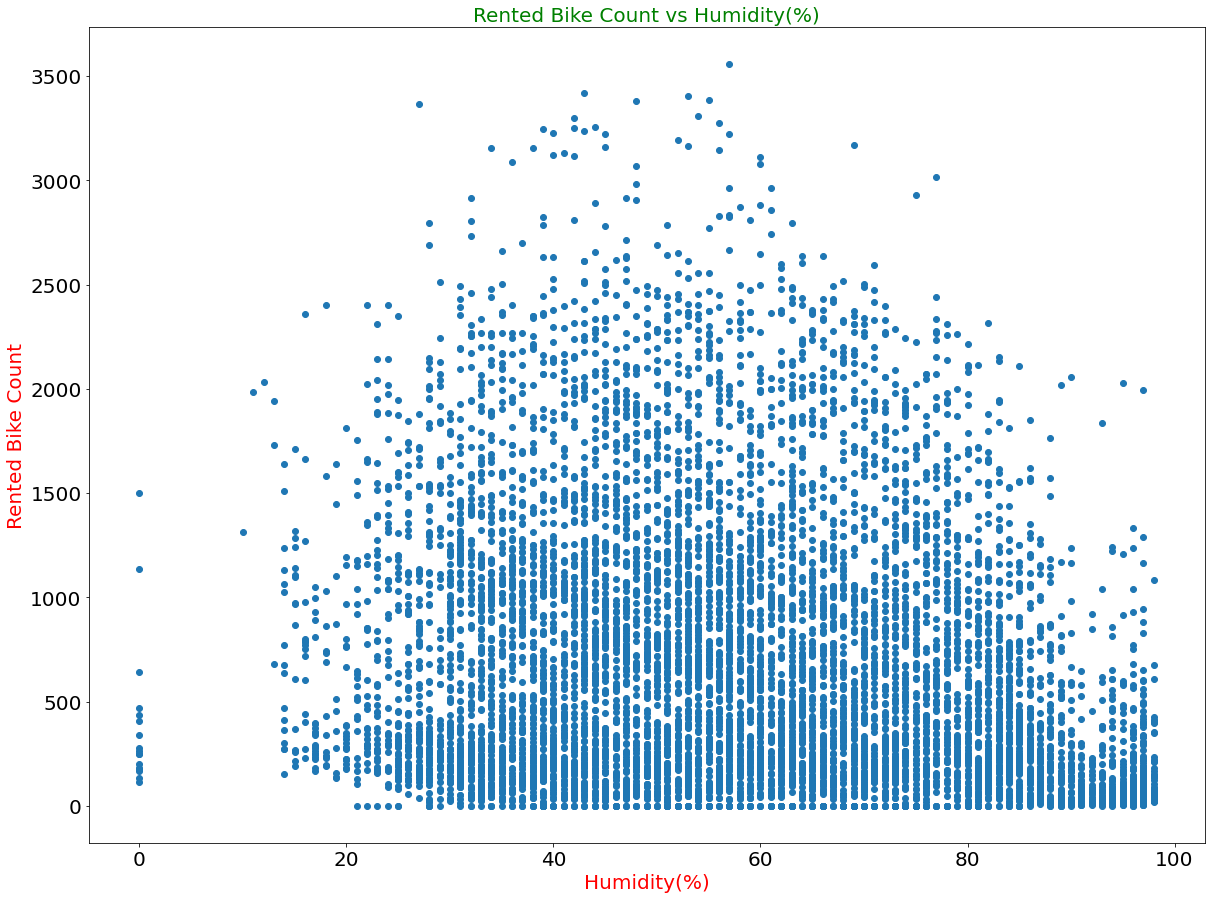

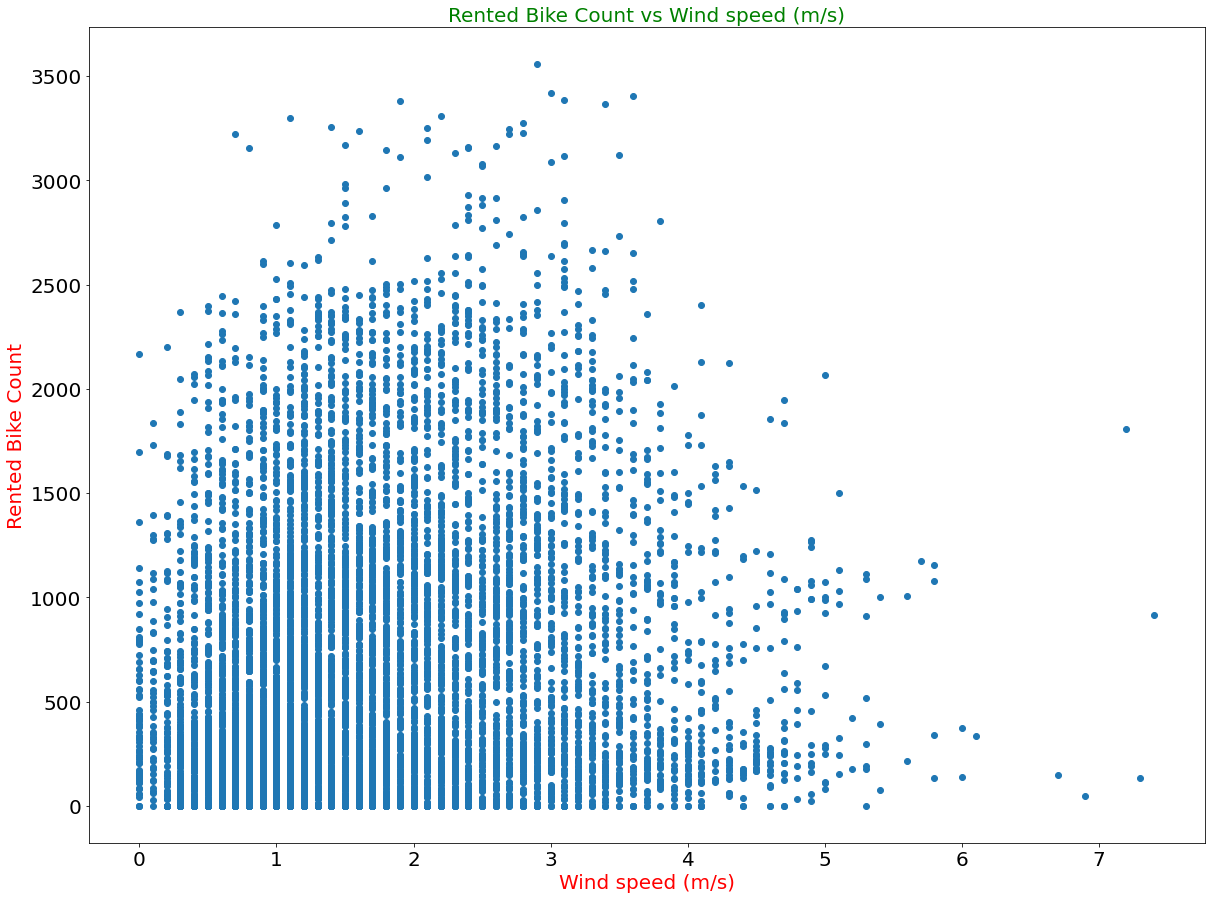

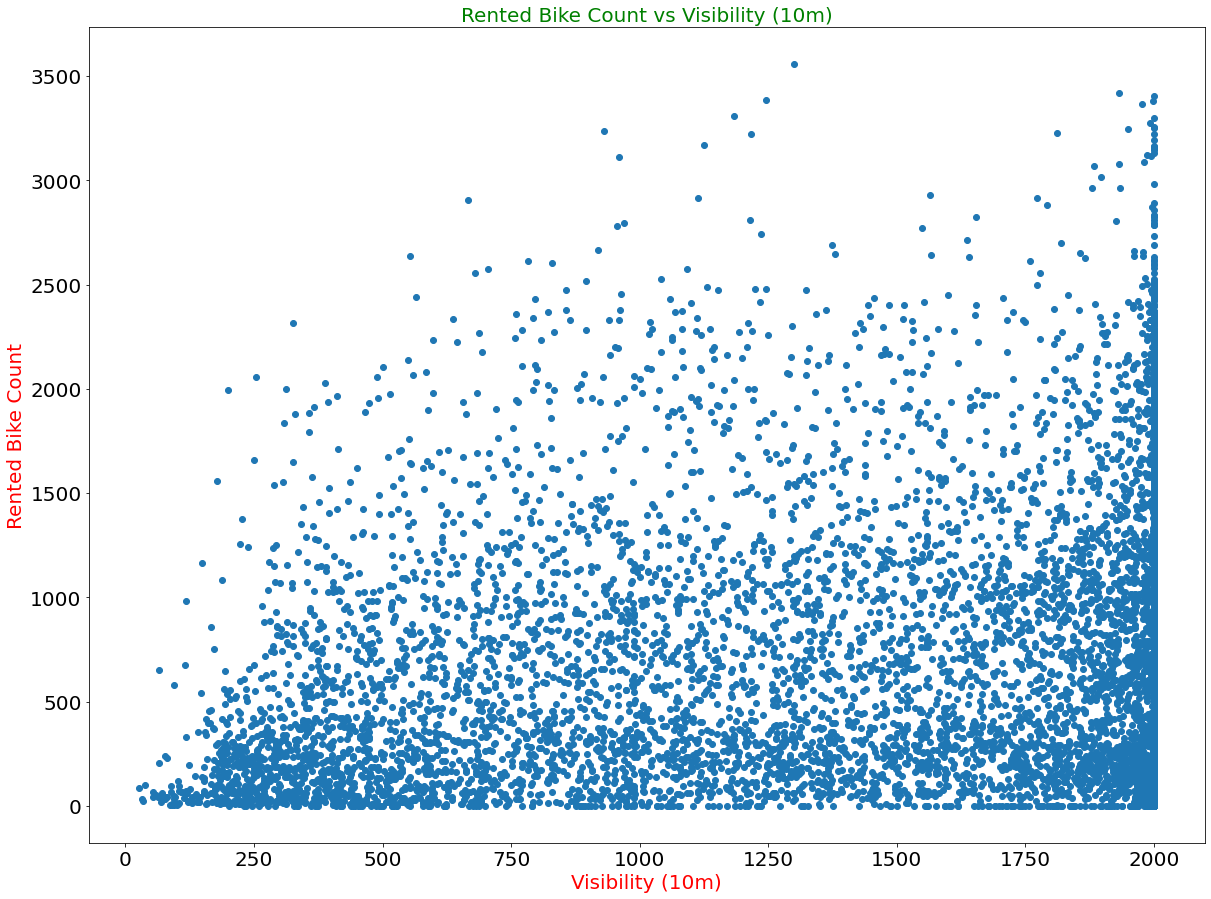

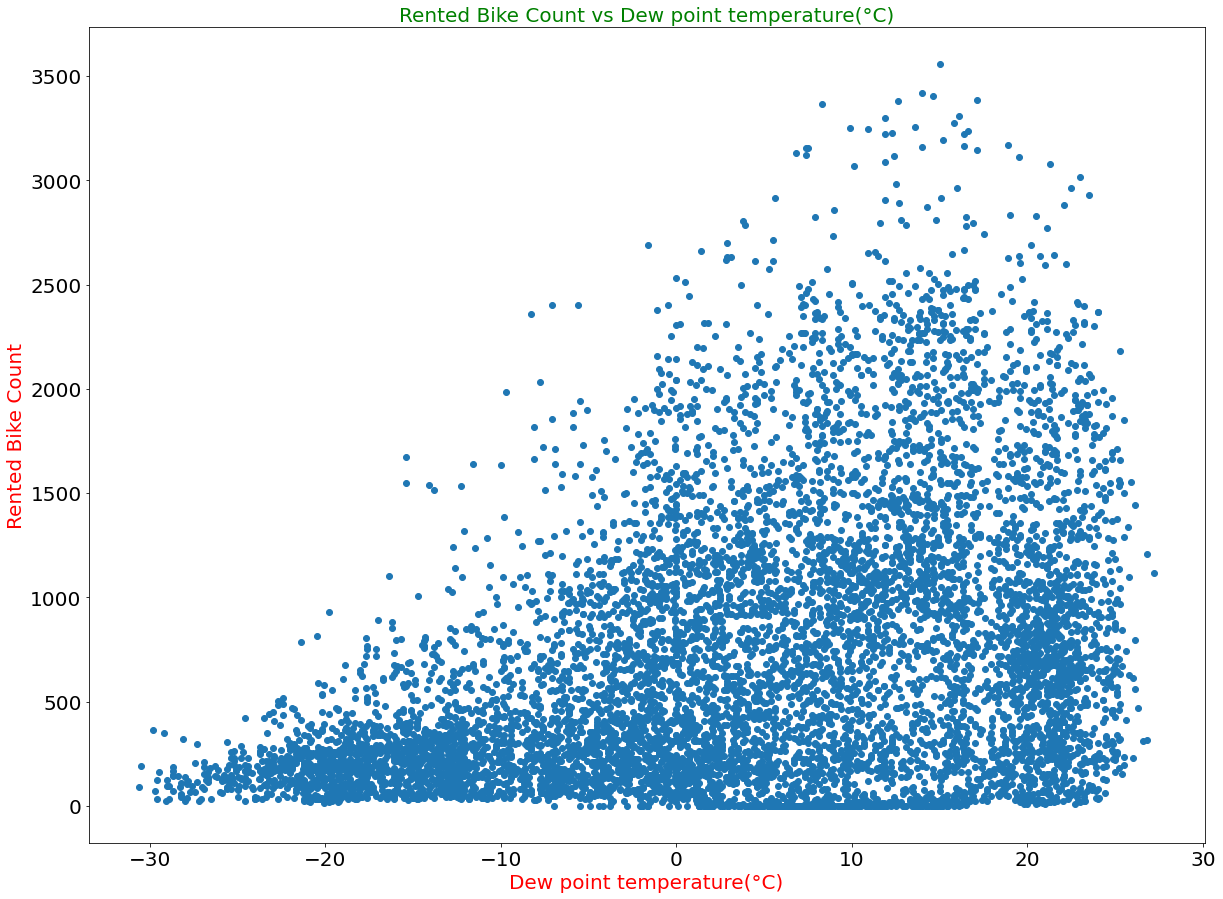

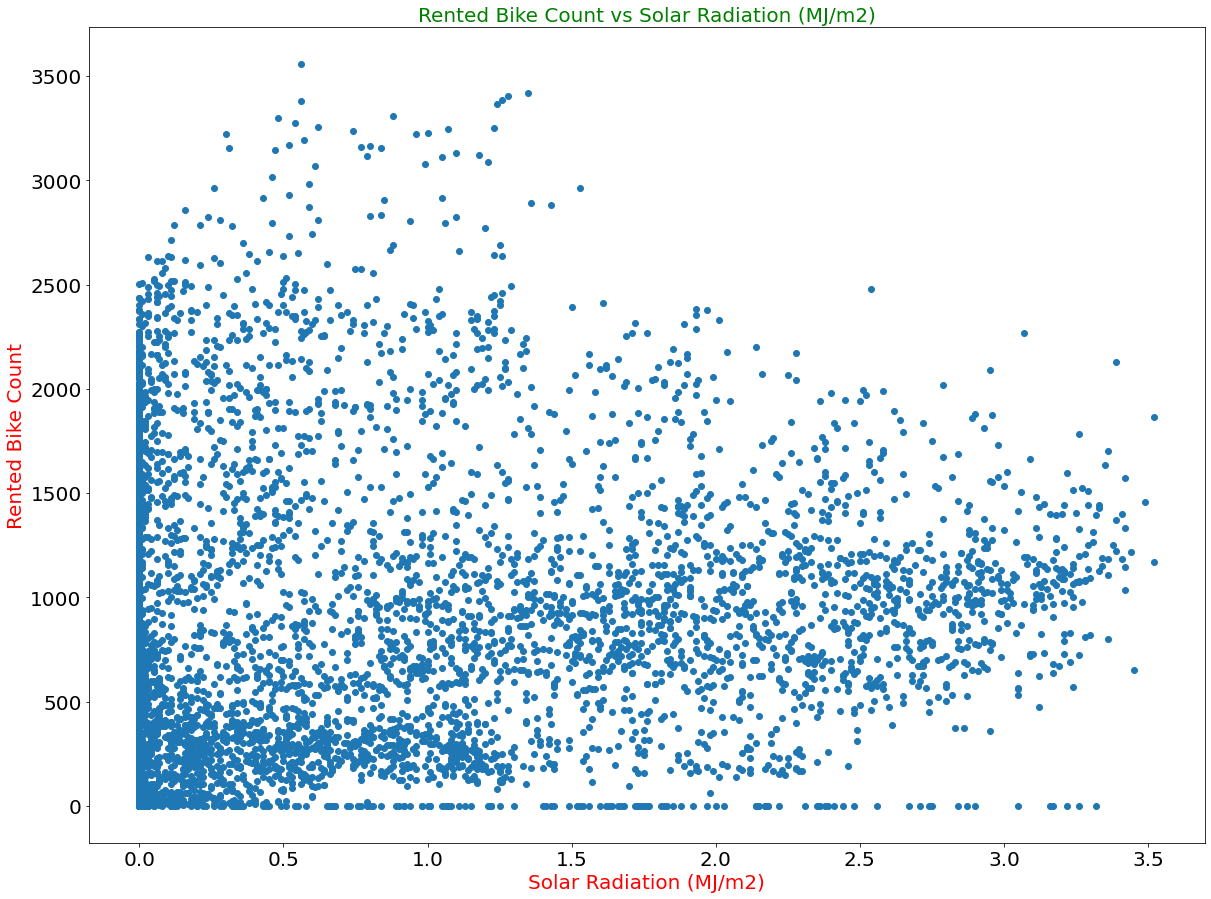

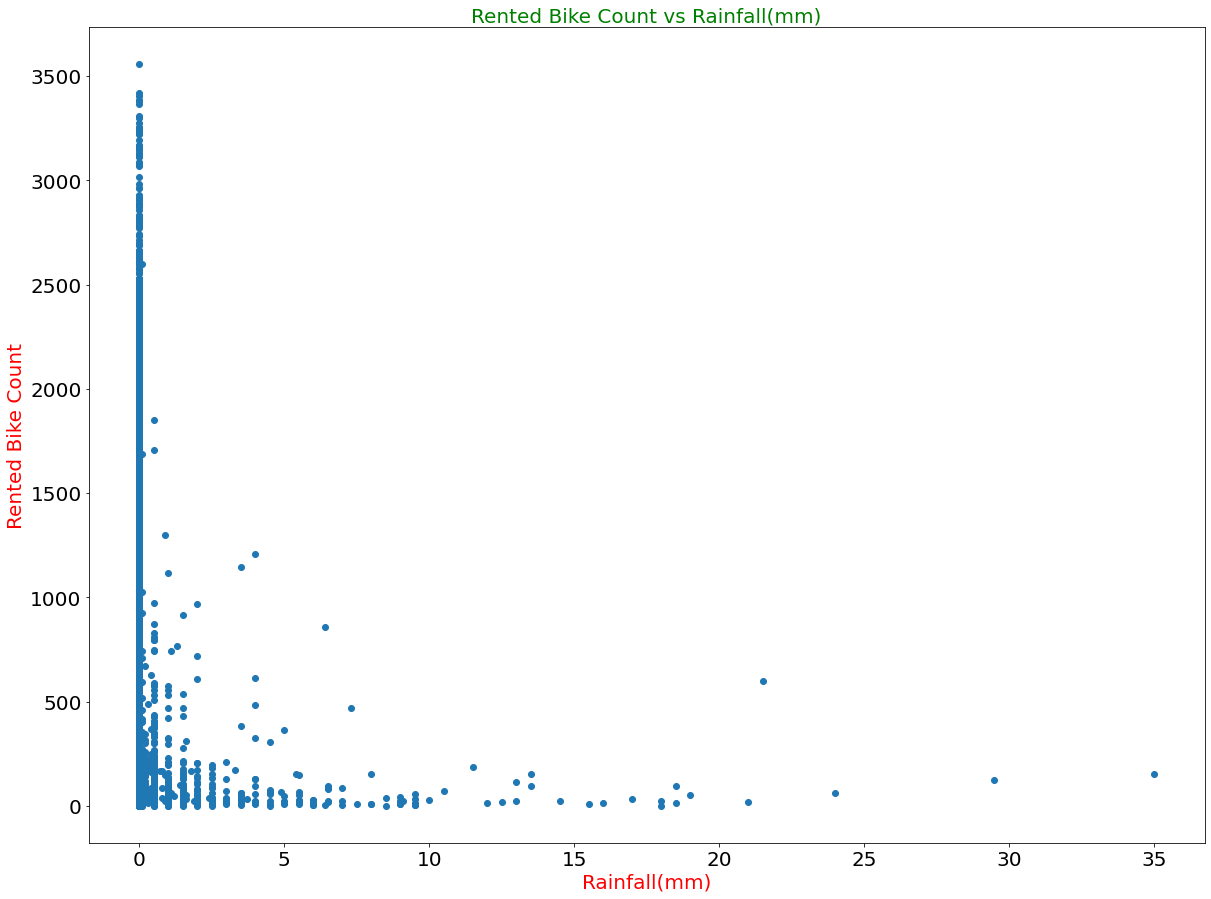

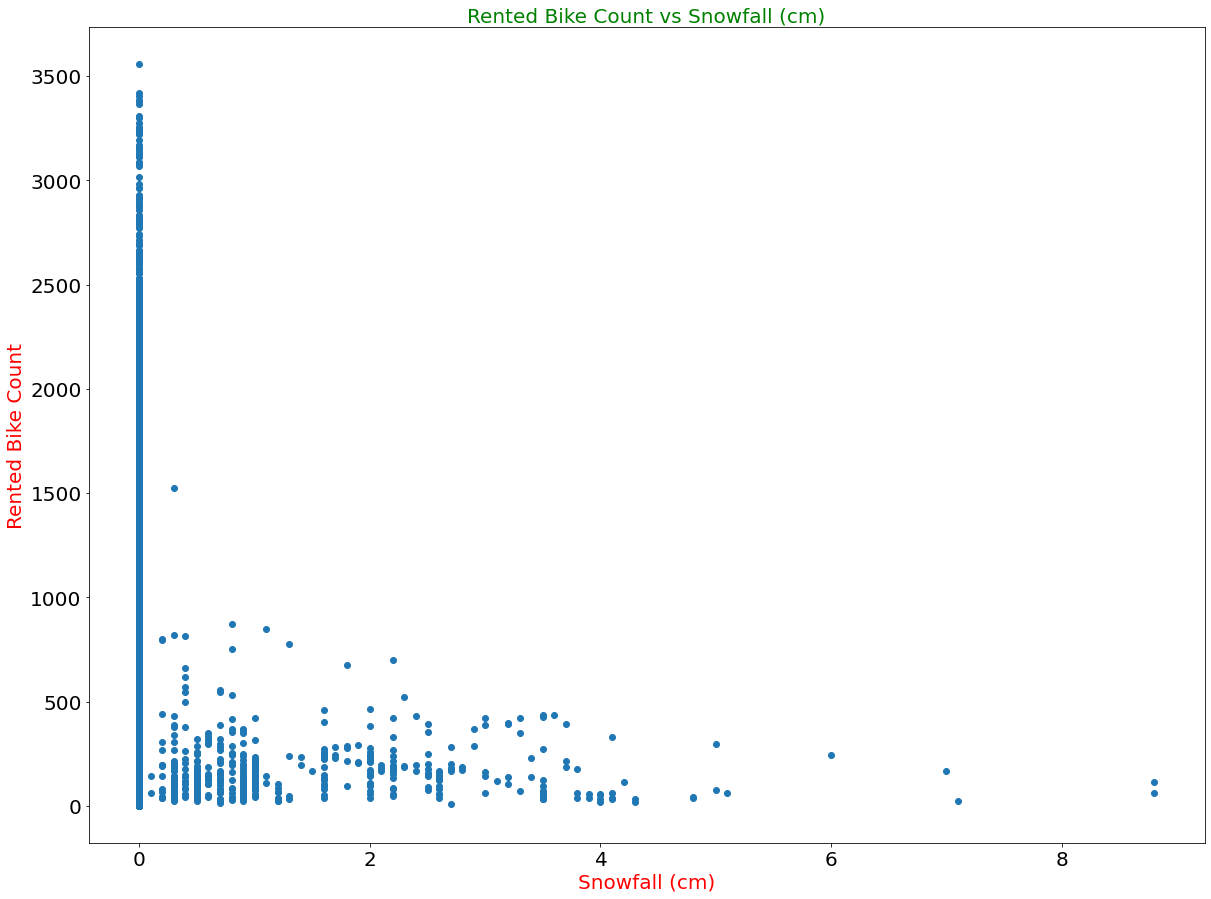

In [20]:
# Ploting scatter graph  for dependent and independent variables
for elem in col_list:
    x = df1[elem]
    y = df1['Rented Bike Count']
    plt.scatter(x,y)
    plt.title(f'Rented Bike Count vs {elem}', fontsize=20, color='green')
    plt.ylabel('Rented Bike Count', fontsize=20, color='red')
    plt.xlabel(elem, fontsize=20, color='red')
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.rcParams['figure.figsize'] = (20, 15)
    plt.show()

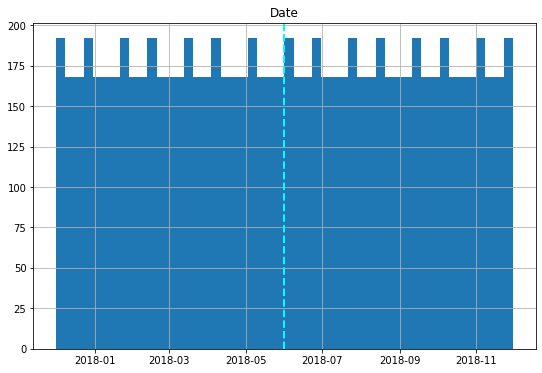

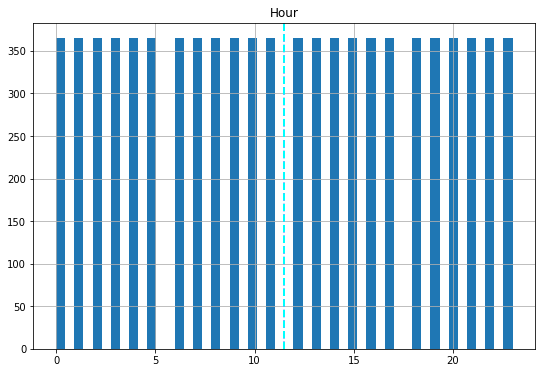

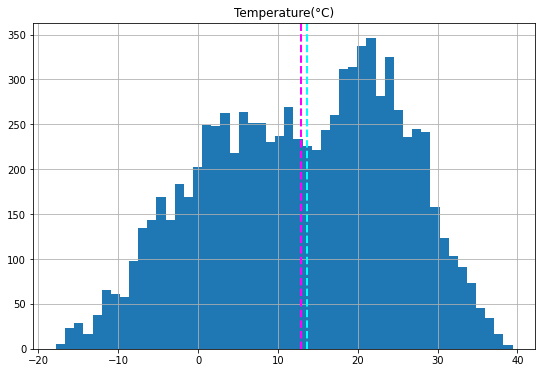

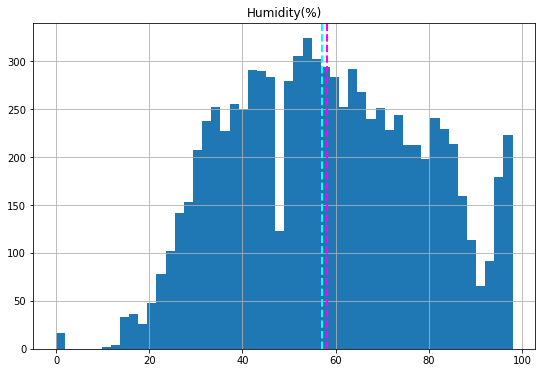

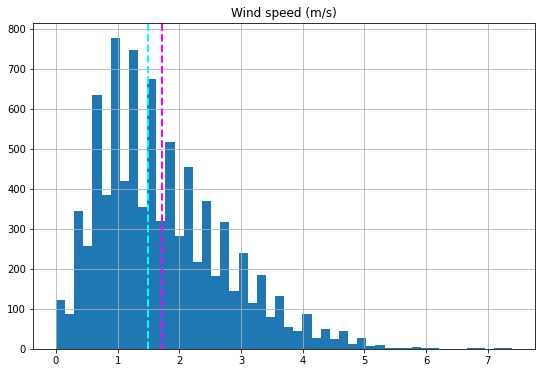

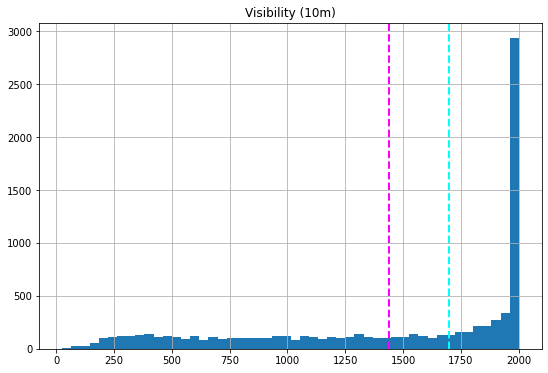

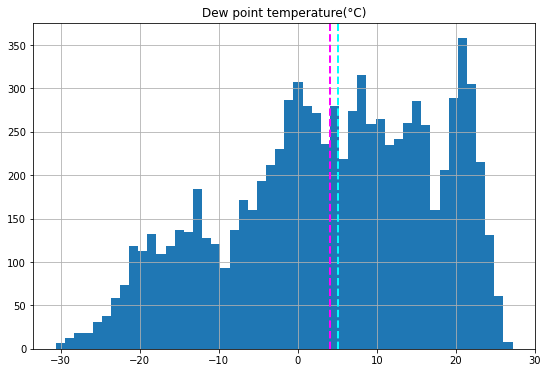

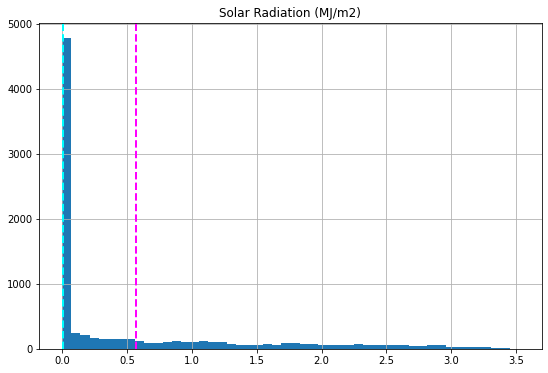

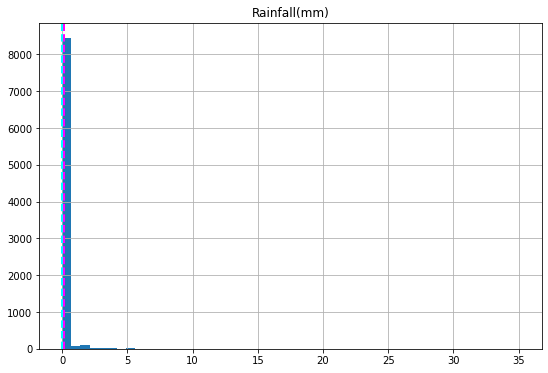

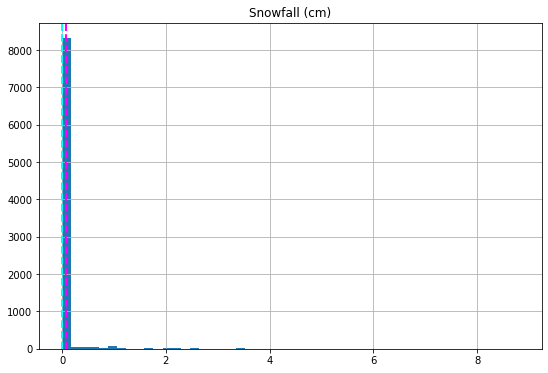

In [21]:
# Finding mean and median:
for elem in col_list:
    x = df1[elem]
    y = df1['Rented Bike Count']
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df1[elem]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(elem)
plt.show()

### Observations:
1. Date vs Rented Bike Count:
   In the winter from Dec 2017 to Feb 2018, rented bikes per hour limited to      1000. While in the summer to next  early winter it continued to as high as      3500 rented bikes per hour.
2. Hour time vs Rented Bike Count
   The minimum average bike counts are at 5:00 AM. While maximum average bike      counts are at 6:00 PM. 
   Early morning has lowest bike demands, there is sudden increase in bike        demand during morning(8 to 10 AM), Evening has highest total bike demands      while afternoon has second highest. 
3. To be continueed...

In [22]:
df1[df1['Seasons']=='Winter']['Date'].unique()
# Winter rows = 2160  (01-12-2017 to 27-02-2018)
# Spring rows = 2208  (01-03-2018 to 30-05-2018)
# Summer rows = 2208  (01-06-2018 to 30-08-2018)
# Autumn rows = 2184  (01-09-2018 to 30-11-2018)

array(['2017-12-01T00:00:00.000000000', '2017-12-02T00:00:00.000000000',
       '2017-12-03T00:00:00.000000000', '2017-12-04T00:00:00.000000000',
       '2017-12-05T00:00:00.000000000', '2017-12-06T00:00:00.000000000',
       '2017-12-07T00:00:00.000000000', '2017-12-08T00:00:00.000000000',
       '2017-12-09T00:00:00.000000000', '2017-12-10T00:00:00.000000000',
       '2017-12-11T00:00:00.000000000', '2017-12-12T00:00:00.000000000',
       '2017-12-13T00:00:00.000000000', '2017-12-14T00:00:00.000000000',
       '2017-12-15T00:00:00.000000000', '2017-12-16T00:00:00.000000000',
       '2017-12-17T00:00:00.000000000', '2017-12-18T00:00:00.000000000',
       '2017-12-19T00:00:00.000000000', '2017-12-20T00:00:00.000000000',
       '2017-12-21T00:00:00.000000000', '2017-12-22T00:00:00.000000000',
       '2017-12-23T00:00:00.000000000', '2017-12-24T00:00:00.000000000',
       '2017-12-25T00:00:00.000000000', '2017-12-26T00:00:00.000000000',
       '2017-12-27T00:00:00.000000000', '2017-12-28

In [23]:
categorical_features = ['Seasons','Holiday','Functioning Day']

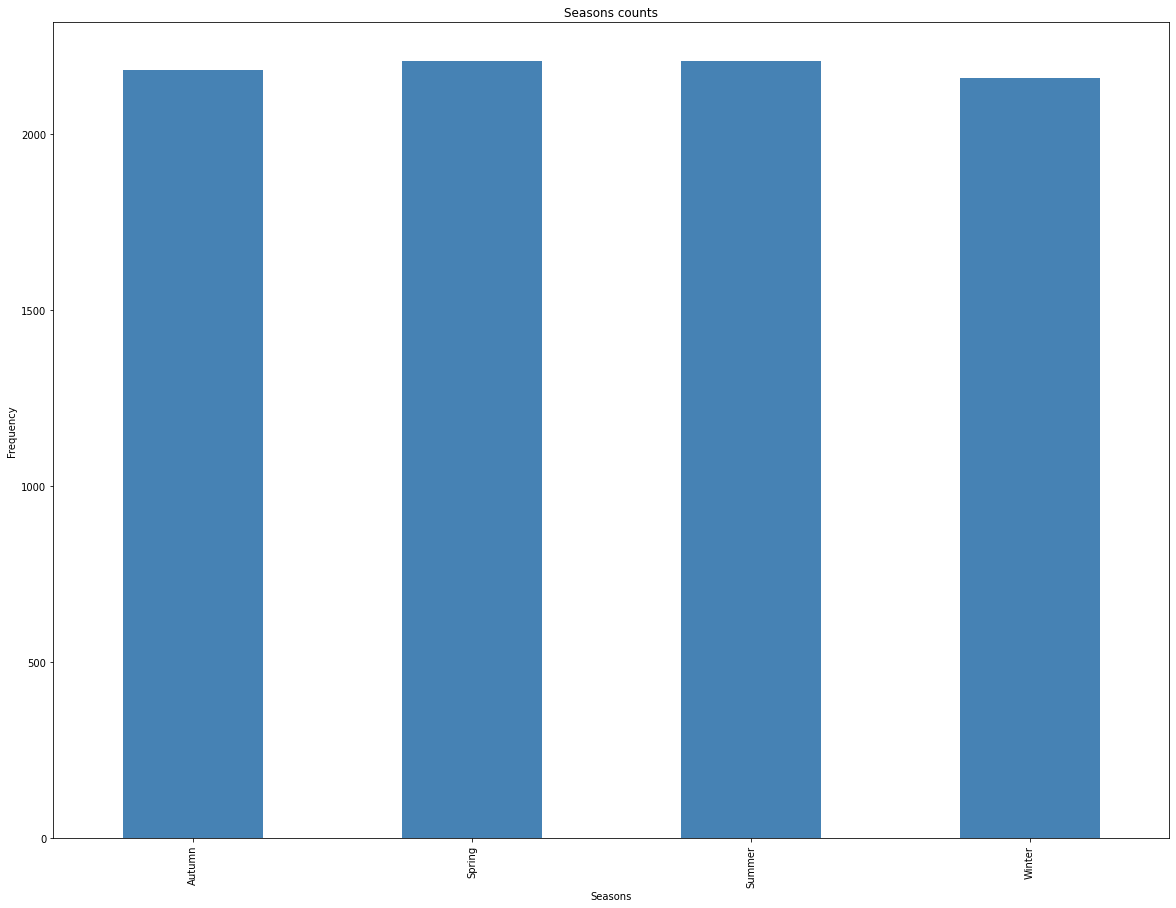

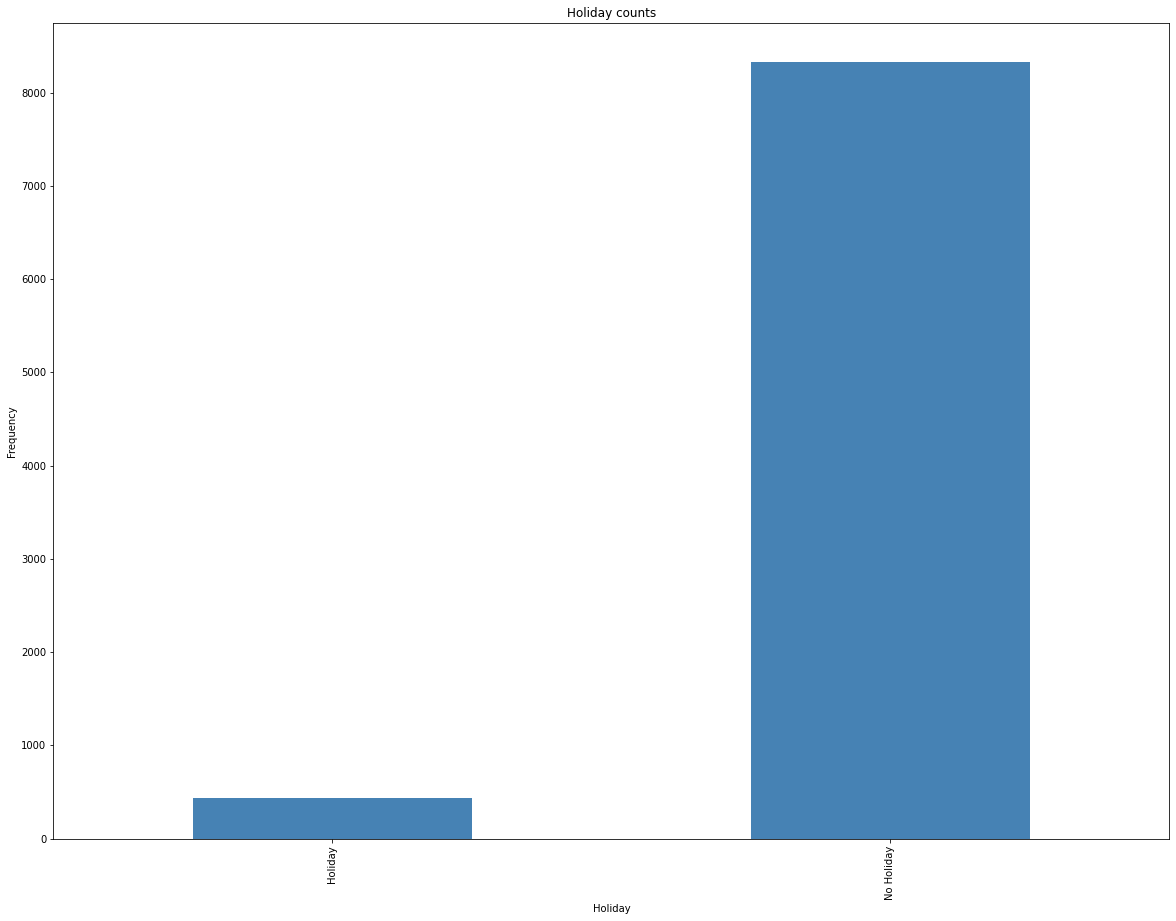

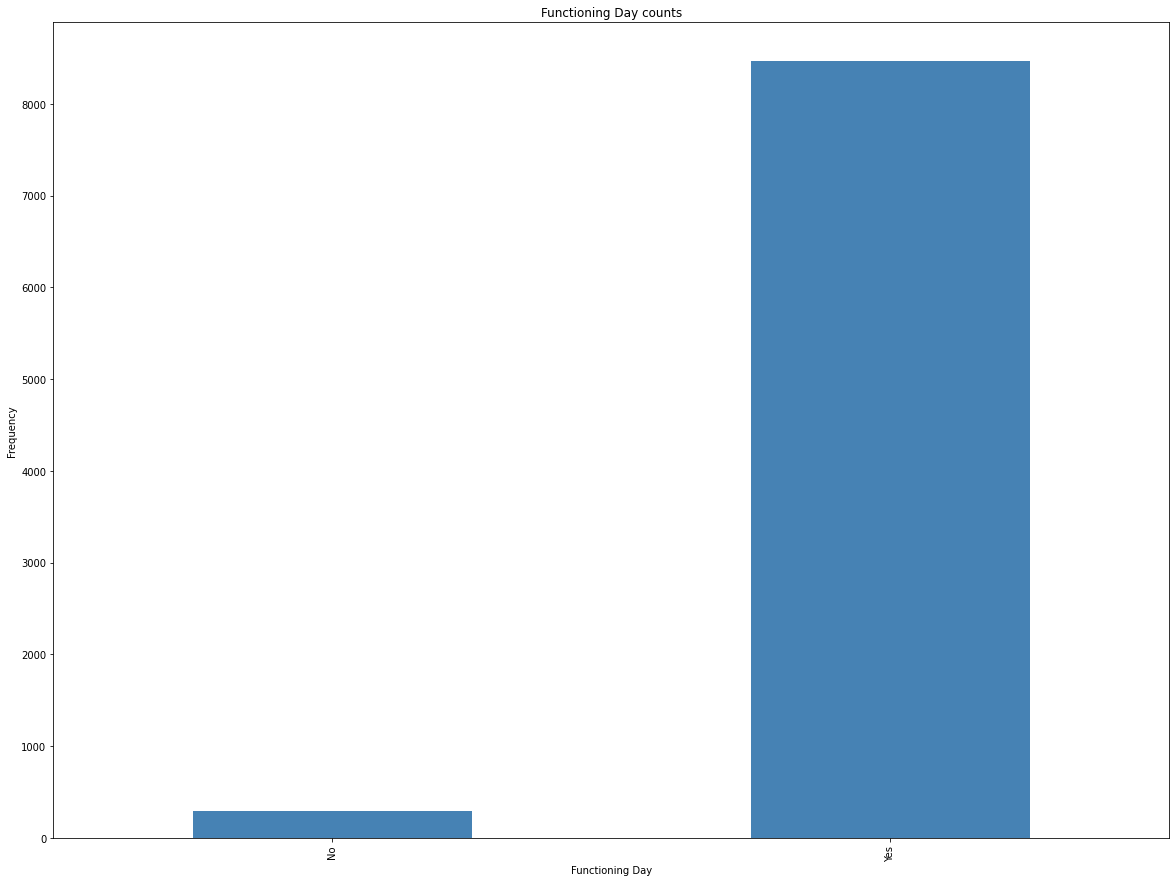

In [24]:
for col in categorical_features:
    counts = df1[col].value_counts().sort_index()
    fig = plt.figure(figsize=(20, 15))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [25]:
df1_pr = df1.copy()

In [26]:
encoders_nums = {"Seasons":{"Winter":0,"Spring":1, "Summer":2, "Autumn":3},
                 "Holiday":{"Holiday":1,"No Holiday":0},
                 "Functioning Day":     {"Yes": 1, "No": 0},}

df1_pr = df1_pr.replace(encoders_nums)


In [27]:
# Create dummy variables for the catgeorical variable State
df1_pr['Winter'] = np.where(df1_pr['Seasons']=='Winter', 1, 0)
df1_pr['Spring'] = np.where(df1_pr['Seasons']=='Spring', 1, 0)
df1_pr['Summer'] = np.where(df1_pr['Seasons']=='Summer', 1, 0)
df1_pr['Autumn'] = np.where(df1_pr['Seasons']=='Winter', 1, 0)
df1_pr['Holiday'] = np.where(df1_pr['Holiday']=='Holiday', 1, 0)
df1_pr['No Holiday'] = np.where(df1_pr['Holiday']=='No Holiday', 1, 0)
df1_pr['Yes'] = np.where(df1_pr['Functioning Day']=='Yes', 1, 0)
df1_pr['No'] = np.where(df1_pr['Functioning Day']=='No', 1, 0)


# Drop the original columns from the dataframe
df1_pr.drop(columns=['Seasons'],axis=1,inplace=True)
df1_pr.drop(columns=['Holiday'],axis=1,inplace=True)
df1_pr.drop(columns=['Functioning Day'],axis=1,inplace=True)

In [51]:
df_new = df1_pr.drop('Date',axis=1)

In [52]:
df_new

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Winter,Spring,Summer,Autumn,No Holiday,Yes,No
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,0,0,0,0,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,0,0,0,0,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,0,0,0,0,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,0,0,0,0,0


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_new.values, i)
                          for i in range(len(df_new.columns))]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [57]:
print(vif_data)

                      feature        VIF
0           Rented Bike Count   4.128938
1                        Hour   5.043107
2             Temperature(°C)  36.351729
3                 Humidity(%)   5.507031
4            Wind speed (m/s)   4.806546
5            Visibility (10m)   9.104336
6   Dew point temperature(°C)  17.334133
7     Solar Radiation (MJ/m2)   2.914067
8                Rainfall(mm)   1.104359
9               Snowfall (cm)   1.121057
10                     Winter        NaN
11                     Spring        NaN
12                     Summer        NaN
13                     Autumn        NaN
14                 No Holiday        NaN
15                        Yes        NaN
16                         No        NaN


In [29]:
# importing modules for prediction
from sklearn import linear_model

['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Winter', 'Spring', 'Summer', 'Autumn', 'No Holiday', 'Yes', 'No']


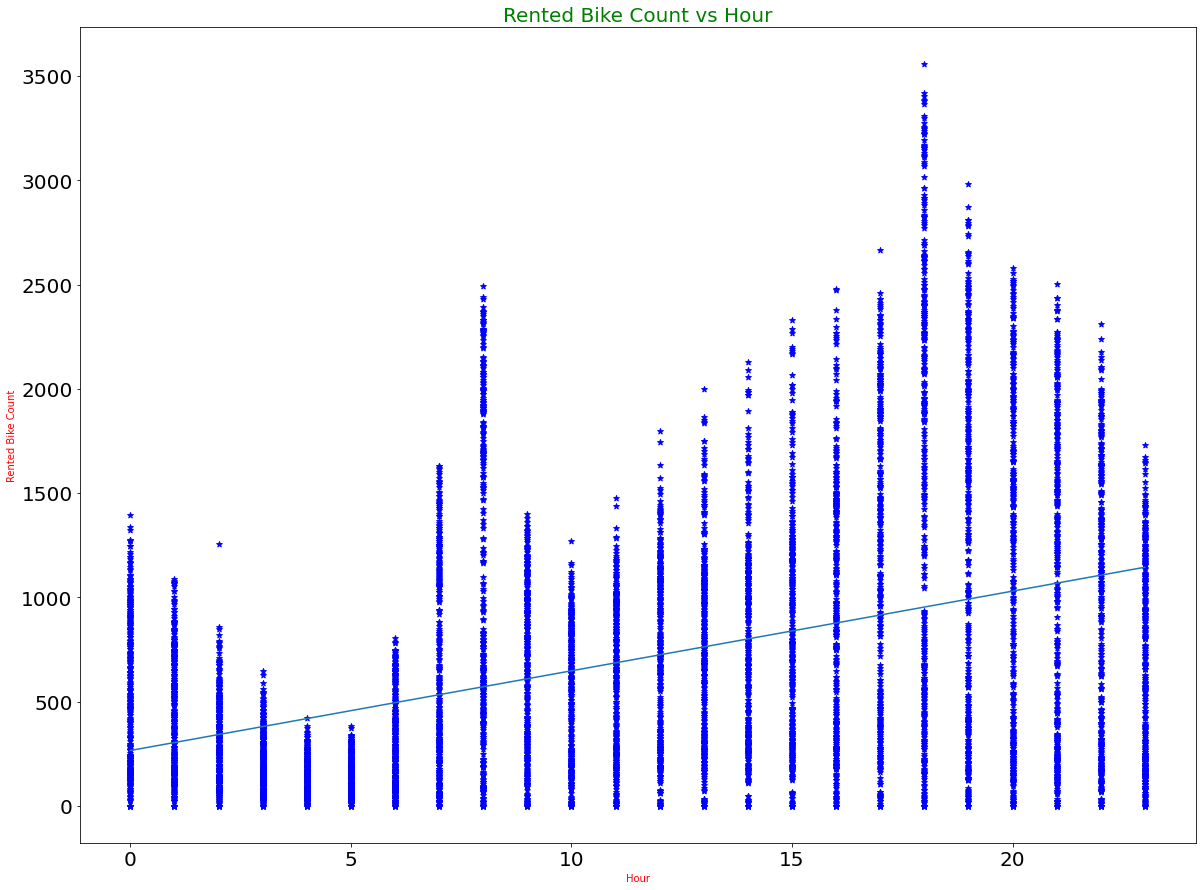

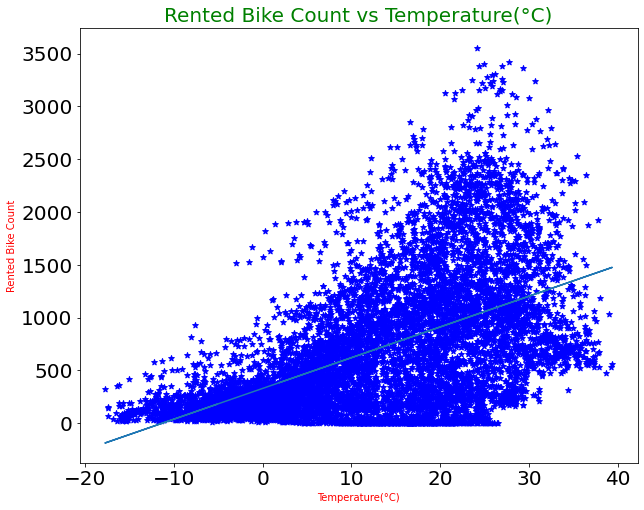

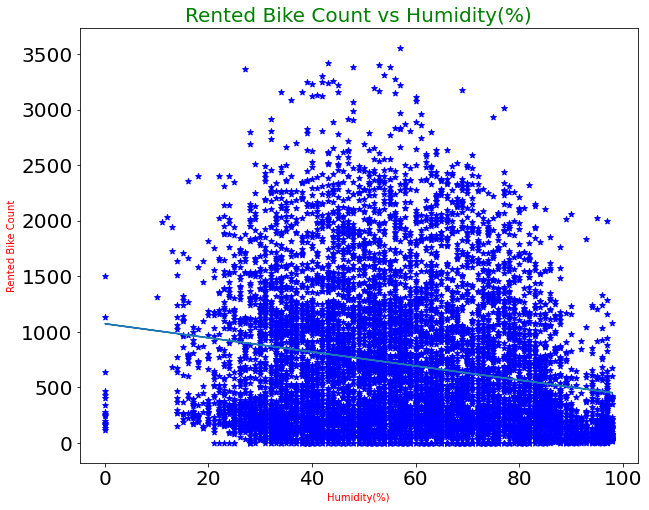

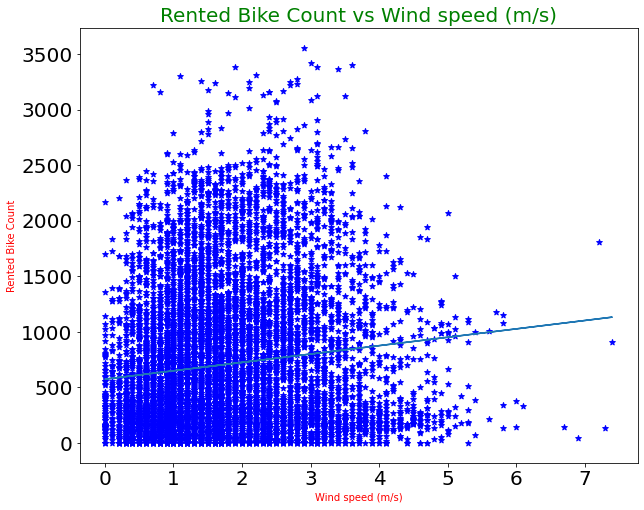

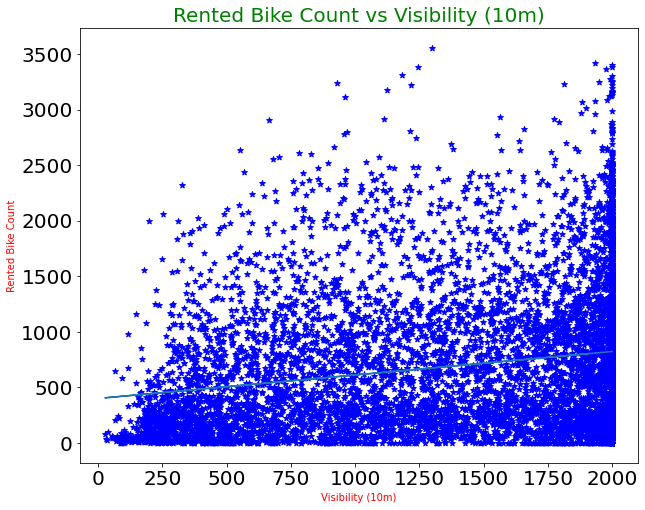

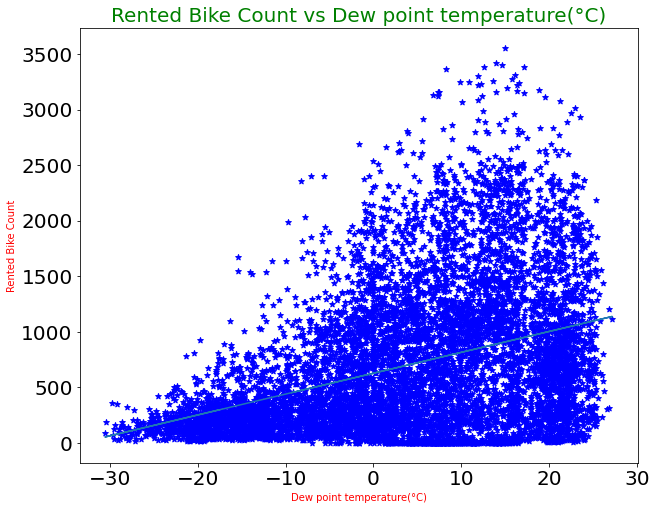

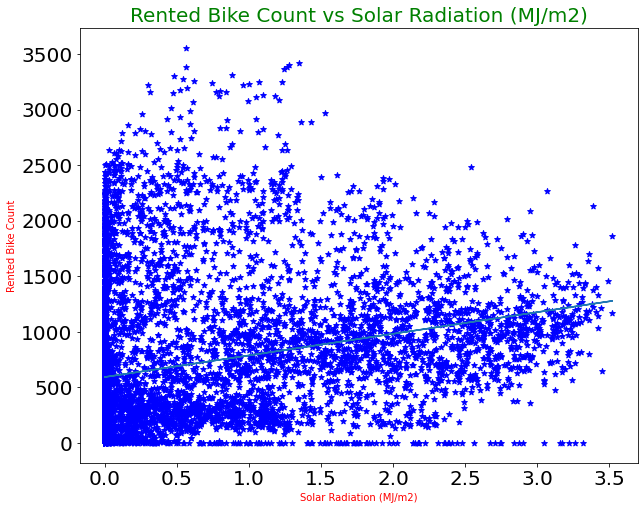

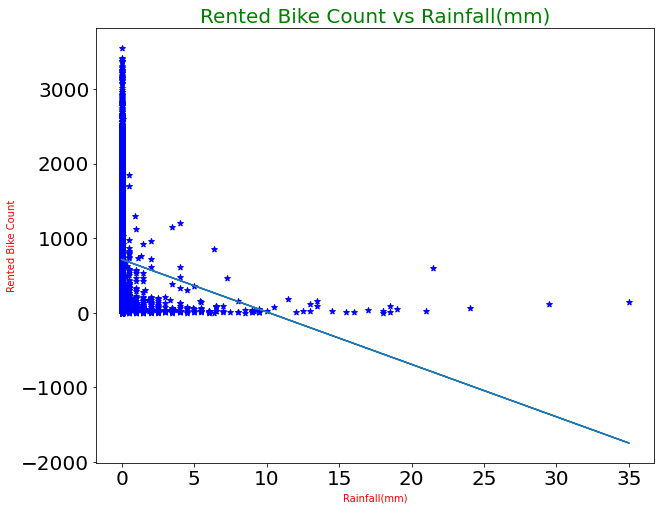

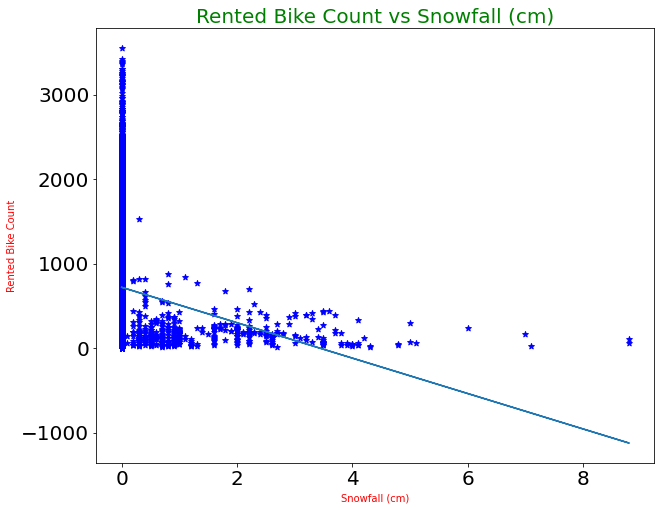

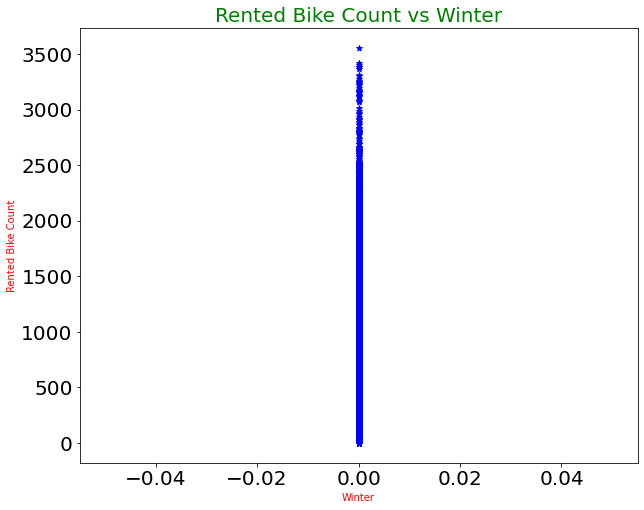

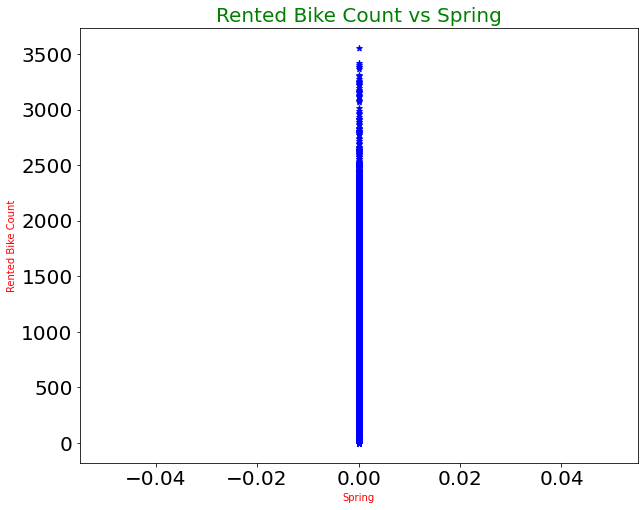

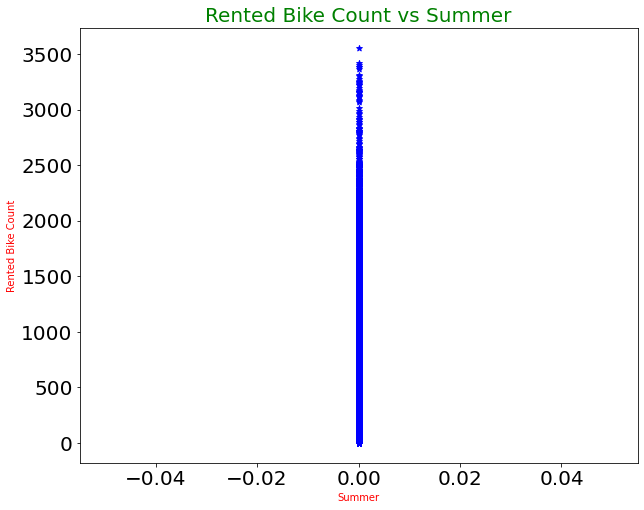

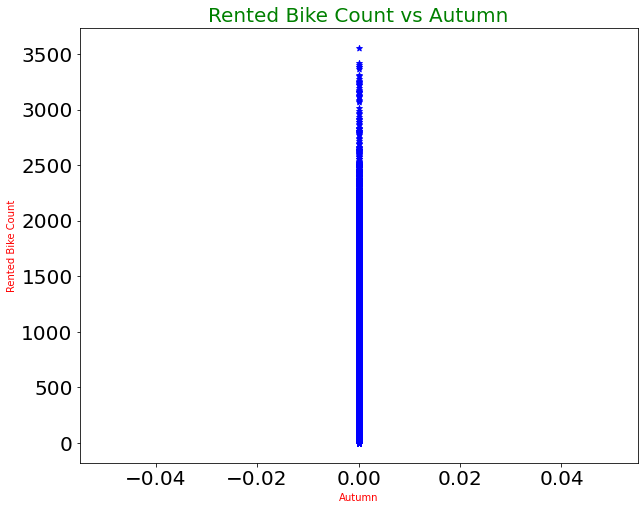

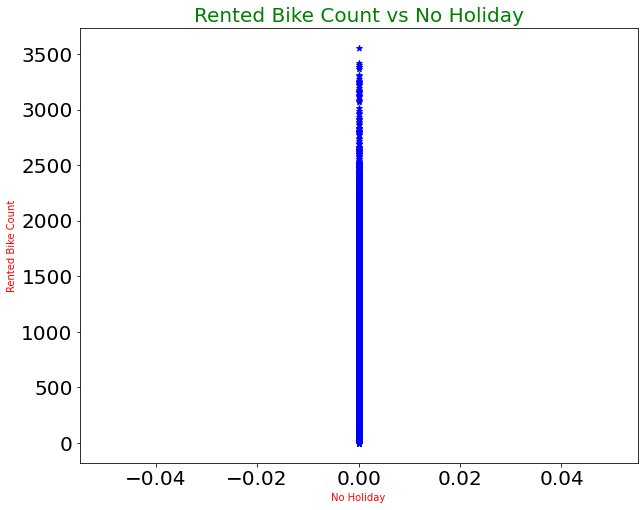

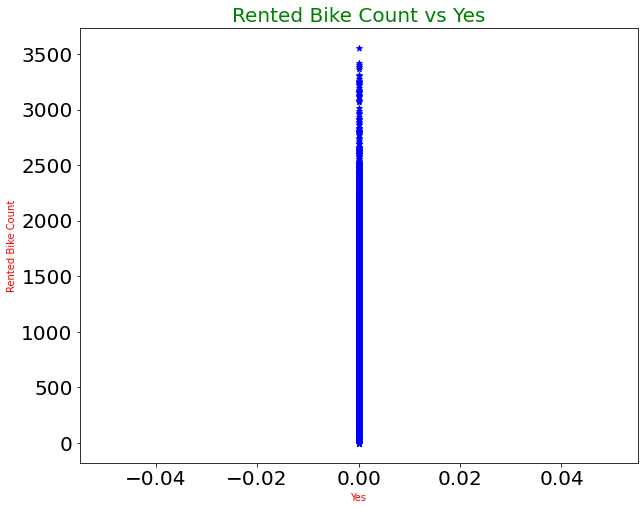

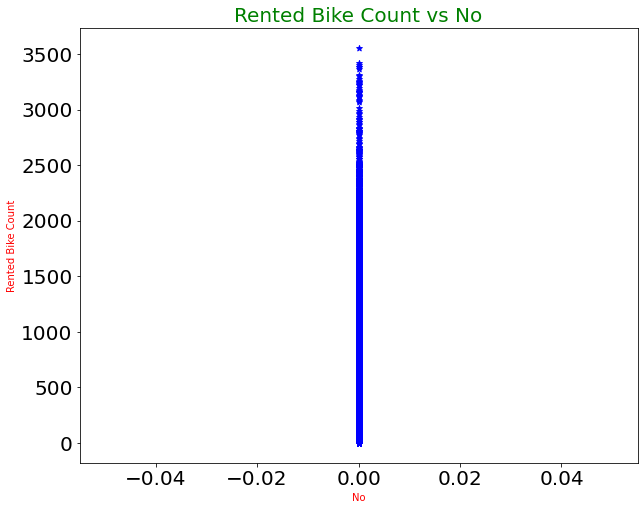

In [30]:
# Extracting essential columns
col_list = []
for e in list(df1_pr.columns):
    col_list.append(e)
list2 = ['Date','Rented Bike Count']
for e in list2:
    col_list.remove(e)    
print(col_list)

for elem in col_list:
    y = df1_pr['Rented Bike Count']
    reg = linear_model.LinearRegression()
    reg.fit(df1_pr[[elem]],y)
    plt.title(f'Rented Bike Count vs {elem}', fontsize=20, color='green')
    plt.xlabel(elem, color='red')
    plt.ylabel('Rented Bike Count', color='red')
    plt.scatter(df1_pr[elem],y, color='blue', marker='*')
    plt.plot(df1_pr[elem], reg.predict(df1_pr[[elem]]))
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.show()

In [31]:
reg = linear_model.LinearRegression()
reg.fit(df1_pr[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','Winter',
       'Spring', 'Summer', 'Autumn', 'No Holiday', 'Yes', 'No']],df1_pr['Rented Bike Count'])

LinearRegression()

In [32]:
reg.coef_

array([ 2.72707359e+01,  3.16670142e+01, -7.44853883e+00,  6.63645293e+00,
        2.23901441e-02, -8.16905839e+01, -5.94941259e+01,  2.00154511e+01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [33]:
reg.intercept_

426.9418940197408

In [34]:
# Let's predict
reg.predict([[1,-3.3,41,0.7,2000,0.00,0.0,0.0,0,0,0,0,0,0,0]])  
# predicted: 93
# Actual: 230

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([93.74719611])

In [35]:
df1[df1['Date']=='2018-01-01']

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
744,2018-01-01,206,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,0.0,Winter,Holiday,Yes
745,2018-01-01,230,1,-3.3,41,0.7,2000,-14.7,0.00,0.0,0.0,Winter,Holiday,Yes
746,2018-01-01,178,2,-3.7,42,0.9,2000,-14.7,0.00,0.0,0.0,Winter,Holiday,Yes
747,2018-01-01,119,3,-4.0,44,1.0,2000,-14.4,0.00,0.0,0.0,Winter,Holiday,Yes
748,2018-01-01,62,4,-4.2,53,1.1,1994,-12.3,0.00,0.0,0.0,Winter,Holiday,Yes
749,2018-01-01,61,5,-4.4,54,0.8,1786,-12.3,0.00,0.0,0.0,Winter,Holiday,Yes
750,2018-01-01,65,6,-4.5,51,1.1,2000,-13.1,0.00,0.0,0.0,Winter,Holiday,Yes
751,2018-01-01,81,7,-4.7,56,1.1,2000,-12.1,0.00,0.0,0.0,Winter,Holiday,Yes
752,2018-01-01,89,8,-5.0,55,1.0,2000,-12.6,0.00,0.0,0.0,Winter,Holiday,Yes
753,2018-01-01,121,9,-4.3,39,0.7,1973,-16.2,0.15,0.0,0.0,Winter,Holiday,Yes


In [36]:
# Now let's predict with train test data of complete dataframe

x = df_dec_17.drop(columns=['Date','Rented Bike Count', 'Seasons', 'Holiday', 'Functioning Day'])
x
y = df_dec_17['Rented Bike Count']
y

0      254
1      204
2      173
3      107
4       78
      ... 
763    125
764    206
765    203
766    168
767    154
Name: Rented Bike Count, Length: 768, dtype: int64

In [133]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, auc
import time

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.05, random_state=41)

In [154]:
start = time.time()
model2 = DecisionTreeRegressor(random_state=200)
model2.fit(x_train, y_train)
end = time.time()
train_time = end - start
print('Training_Time:')
print(train_time)

Training_Time:
0.023546695709228516


In [155]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.05, random_state=200)

### Measuring the performance

In [156]:
y_pred_test = model2.predict(x_test)
y_pred_train = model2.predict(x_train)

In [157]:
print(model2.score(x_train, y_train))
print(model2.score(x_test, y_test))

0.9631125106009714
0.9844003921616614


In [158]:
from sklearn import metrics 
# Computing scores
print(f'Train Score:{metrics.r2_score(y_train,y_pred_train)}')
print(f'Test Score:{metrics.r2_score(y_test,y_pred_test)}')

# Computing errors
print(f'MAE:{metrics.mean_absolute_error(y_test,y_pred_test)}')
print(f'MSE:{metrics.mean_squared_error(y_test,y_pred_test)}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE : % f" %(rmse))

Train Score:0.9631125106009714
Test Score:0.9844003921616614
MAE:3.2051282051282053
MSE:400.64102564102564
RMSE :  20.016019


### Visualizing the predicted vs test value

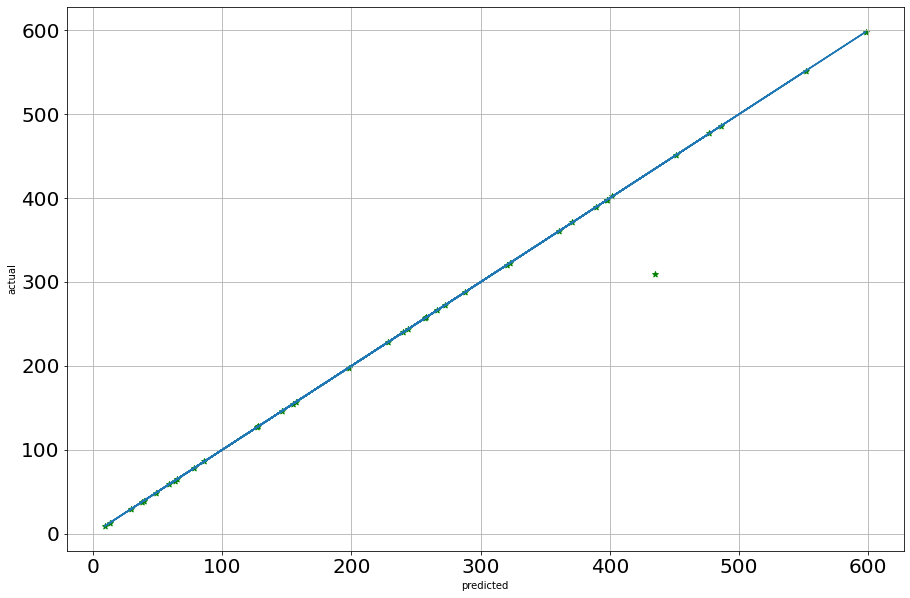

In [159]:
plt.xlabel('predicted')
plt.ylabel('actual')
plt.scatter(y_pred_test, y_test, color='green', marker='*')
plt.plot(y_pred_test, model2.predict(x_test))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.rcParams['figure.figsize'] = (15,10)
plt.grid()
plt.show()

# With decision tree, we obtained test accuracy of 98%

In [160]:
model2.predict([[1,-3.3,41,0.7,2000,-14.7,0.00,0.0,0.0]])
# Predicted: 230
# Actual: 230

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([230.])